# Exploratory Data Analysis

## 1. Init
Load necessary libraries and the dataset.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned heart disease dataset
df = pd.read_csv('../data/processed/heart_disease_cleaned.csv')

# Display the first few records to understand data structure
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


##2. Dataset Overview and Data Quality Checks

In [30]:
# Display initial shape of the dataset (rows, columns)
print("Initial dataset shape:", df.shape)

# Check for missing values in each column
# Ensures data completeness before analysis
print("\nMissing values per column:")
print(df.isna().sum())


Initial dataset shape: (297, 14)

Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


##3. Data Type Validation and Cleaning

In [31]:
# Convert all columns to numeric data types
# Any non-numeric or invalid values are coerced to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Remove rows containing missing values
# This ensures statistical calculations and correlations remain valid
df.dropna(inplace=True)

# Display dataset shape after cleaning
print("\nDataset shape after cleaning:", df.shape)



Dataset shape after cleaning: (297, 14)


##4. Target Variable Validation

In [32]:
# Inspect the distribution of the target variable before correction
# Ensures correct label encoding
print("\nTarget value counts before correction:")
print(df['target'].value_counts())

# Convert target variable to binary format if required
# 0 = No Heart Disease, 1 = Presence of Heart Disease
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Verify target distribution after correction
print("\nTarget value counts after correction:")
print(df['target'].value_counts())


Target value counts before correction:
target
0    160
1    137
Name: count, dtype: int64

Target value counts after correction:
target
0    160
1    137
Name: count, dtype: int64


##5. Statistical Summary

Overview of the dataset statistics.

In [33]:
# Generate descriptive statistics for numerical features
# Provides insight into central tendency, spread, and range
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


## 6. Visualizations
### 6.1 Target Distribution

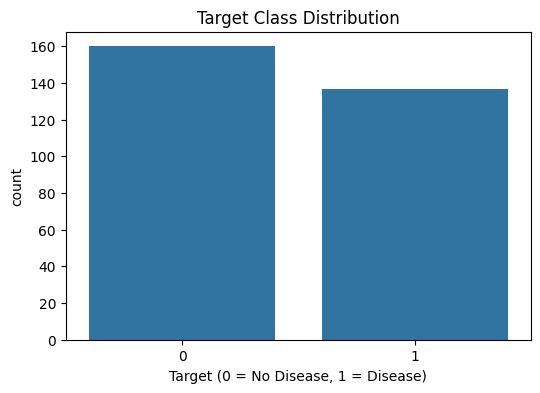

In [34]:
# Visualize class balance between patients with and without heart disease
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Target Class Distribution')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.show()

**Inference:**

The target variable shows a moderately balanced class distribution, with slightly more samples belonging to the non-heart disease class (0) than the heart disease class (1). This indicates that the dataset does not suffer from severe class imbalance, reducing the risk of biased model predictions toward a single class.


### 6.2 Correlation Heatmap

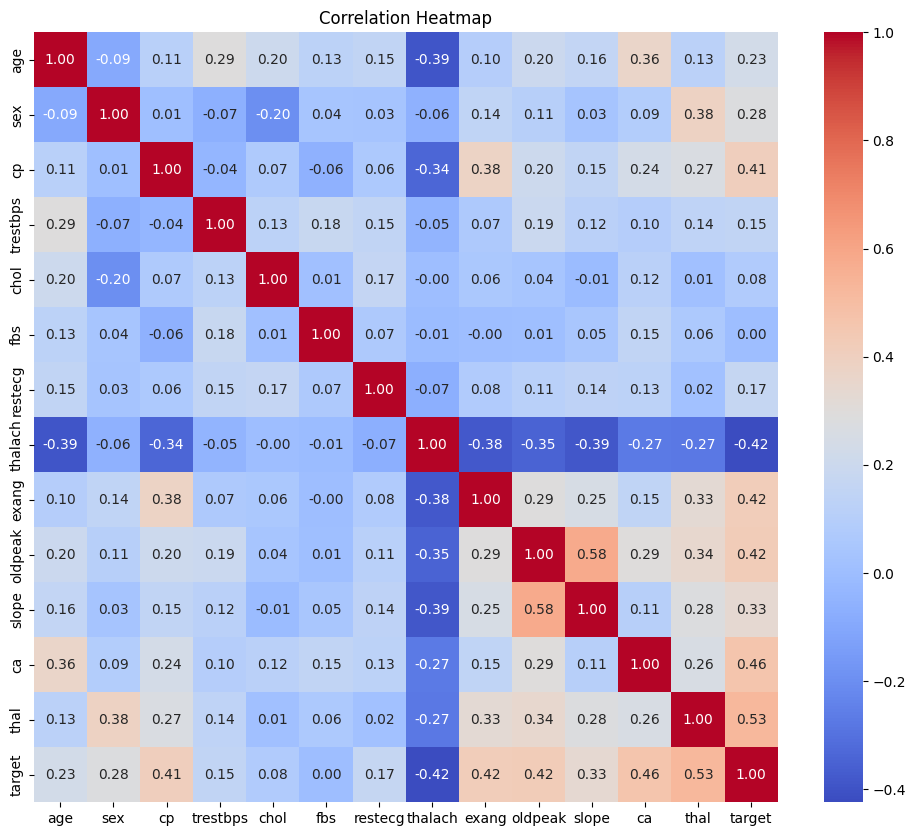

In [35]:
# Plot correlation heatmap to identify relationships between features
# Helps detect strong predictors and multicollinearity
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Inference:**

The correlation heatmap indicates that no single feature is strongly linearly correlated with the target variable, suggesting that heart disease risk is influenced by a combination of factors rather than a single predictor.

## 6.3 Feature Distribution Overview

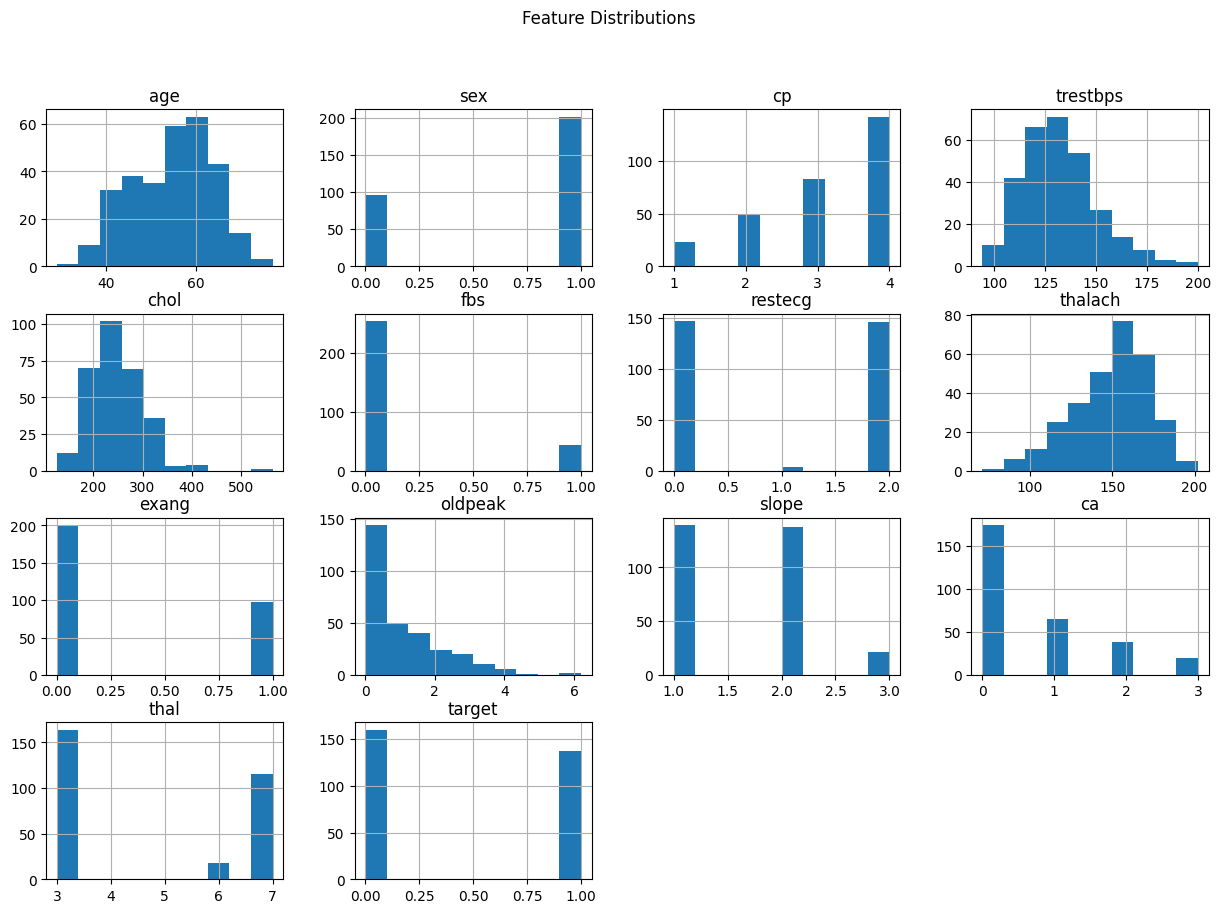

In [36]:
# Plot histograms for all numerical features
# Helps identify skewness, outliers, and value ranges
df.hist(figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()

**Inference:**

The feature distribution plots indicate that the dataset contains a mix of continuous and categorical variables.

## 6.4 Age Distribution by Target

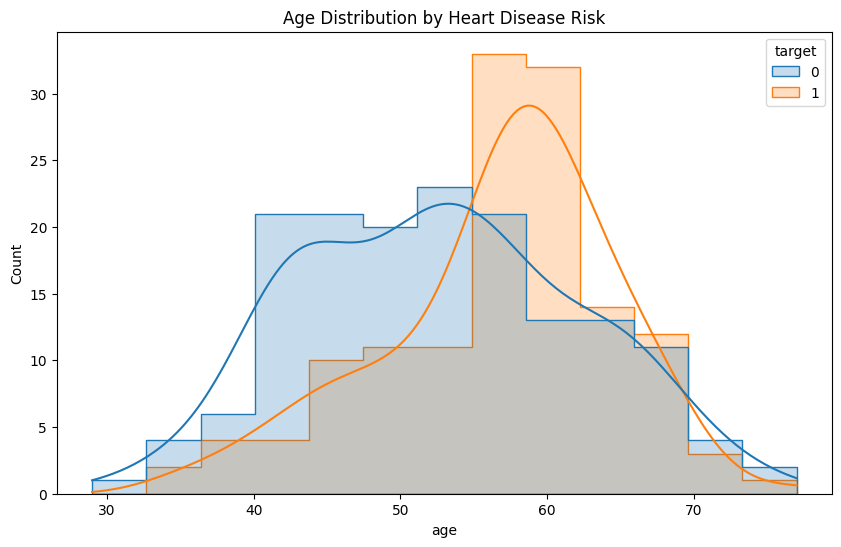

In [37]:
# Analyze age distribution across heart disease risk groups
# KDE overlay helps compare density patterns
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='target', kde=True, element='step')
plt.title('Age Distribution by Heart Disease Risk')
plt.show()

**Inference:**

The age distribution shows a noticeable shift toward higher ages for patients with heart disease compared to those without the condition.